# Ejercicio: Análisis de audiencias televisivas
**Autor**: José A. Troyano.   **Revisores**: Mariano González, Carlos G. Vallejo, José C. Riquelme, Beatriz Pontes, Toñi Reina.   **Última modificación:** 26/09/2022

En este notebook se proporcionan soluciones a la mayoría de las funciones propuestas. 

Trabajaremos con datos de audiencias televisivas, en concreto con los datos de audiencia de diferentes ediciones de varios programas como _MasterChef_, _MasterChef Celebrity_ o _Gran Hermano_. Como resultado del proyecto, obtendremos una serie de indicadores y gráficas que nos permitirán analizar la evolución de la audiencia de un programa televisivo a lo largo del tiempo.

Para analizar los datos de audiencias partiremos de archivos en formato csv (valores separados por coma), en los que tenemos almacenada la información de las audiencias del programa concreto a analizar. Estos archivos csv estarán compuestos por distintas líneas con dos datos separados por comas: la edición a la que pertence el dato de audiencia, y el porcentaje de audiencia (en tanto por uno) obtenido en la emisión concreta (o _share_). Además, los datos aparecerán ordenados por número de emisión. Por ejemplo, si analizamos las 5 primeras líneas del fichero <code>MasterChef.csv</code>, que contiene los datos siguientes:

<pre>
1, .11
1, .1
1, .155
1, .186
1, .155
</pre>

podemos deducir que el primer programa de la primera edición de _MasterChef_ tuvo un _share_ del 11%, el segundo el 10%, el tercero el 15.5%, y así sucesivamente. 

Este notebook nos servirá para ilustrar, sobre un proyecto sencillo, los pasos más comunes de la mayor parte de los ejercicios que haremos a lo largo del curso, ya que para explotar estos datos, estructuraremos nuestro programa en varios tipos de funciones que tendrán una responsabilidad única:

### Funciones de carga de datos. 

Lo primero que tenemos que hacer, si queremos hacer operaciones con los datos almacenados en el archivo, es cargar los datos en la memoria del ordenador. Además, debe tenerse en cuenta que, cuando leemos los datos de un fichero, siempre se leen en formato cadena. La responsabilidad, por tanto, de las funciones de este grupo, será cargar los datos, y hacer las conversiones de tipos necesarias para poder operar con los datos de manera adecuada.

### Funciones de transformación y filtrado.

Una vez tenemos los datos cargados y con los tipos adecuados, tendremos que operar con ellos. Las funciones de este bloque se encargan de realizar las operaciones correspondientes. Cada función tiene una responsabilidad y devuelve un valor. Las funciones de este grupo NO muestran los resultados por la consola con print, ya que su responsabilidad es hacer el cálculo o la operación correspondiente, pero no mostrarle al usuario el resultado.

### Funciones de visualización.

Una vez que hemos hecho las operaciones o cálculos, las funciones de este grupo se encargan de mostrar los resultados, que podrán ser textuales o gráficos. Para mostrar los resultados usaremos tanto módulos de la librería estándar, como paquetes externos, como por ejemplo <code>matplotlib</code> para la generación de gráficas. 

Estas son las correspondientes instrucciones de importación:

In [3]:
import csv
import statistics
from matplotlib import pyplot as plt

## 1. Carga de datos

Tomaremos los datos de un fichero de entrada llamado <code>GH.csv</code>, en el que se encuentran las audiencias de las distintas ediciones del programa televisivo "Gran Hermano" desde la primera edición hasta la número 17.

Cada línea del fichero de entrada se corresponde con la audiencia de un
programa, y contiene dos informaciones: 
- La edición a la que pertenece el programa
- El _share_ (porcentaje de la audiencia que vio ese programa concreto) 

No hay información de fecha, pero las líneas del fichero mantienen el orden cronológico en el que fueron emitidos los correspondientes programas. Estas son las primeras líneas del fichero de entrada:

<pre>
    1,0.37
    1,0.33
    1,0.47
    1,0.46
    1,0.54
    1,0.43
    1,0.59
    1,0.58
</pre>

La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una estructura en memoria. La estructura más apropiada para los datos será una _lista de tuplas_. Una lista porque tenemos como entrada una secuencia de audiencias, y _de tuplas_ porque cada audiencia tiene dos informaciones (edición y _share_).

Las siguientes celdas contienen la implementación y el test, respectivamente, de la función de lectura:

In [4]:
def lee_audiencias(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de audiencias
    
    ENTRADA: 
       @param fichero: nombre del fichero
       @type fichero:  str
    SALIDA: 
       @return: lista de audiencias
       @rtype: [(int, float)] 

    Cada línea del fichero se corresponde con la audiencia de un programa,
    y se representa con una tupla con los siguientes valores:
        - edición
        - audiencia
    Hay que transformar la entrada (cadenas de caracteres) en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    audiencias = []
    with open(fichero, encoding='utf-8') as f:
        for linea in f:
            # Separamos la línea en dos usando ',' como delimitador
            edicion, share = linea.split(',')
            # Transformamos los valores str a int y float
            edicion = int(edicion)
            share = float(share)
            # Creamos una tupla
            tupla = (edicion, share)
            # Añadimos la tupla a la lista
            audiencias.append(tupla)
    return audiencias

In [5]:
# Test de la función lee_audiencias
audiencias_gh = lee_audiencias('./data/GH.csv')
print("Audiencias del programa Gran Hermano:")
print(audiencias_gh[:20])

audiencias_masterchef = lee_audiencias('./data/MasterChef.csv')
print("\nAudiencias del programa MasterChef:")
print(audiencias_masterchef[:20])

Audiencias del programa Gran Hermano:
[(1, 0.37), (1, 0.33), (1, 0.47), (1, 0.46), (1, 0.54), (1, 0.43), (1, 0.59), (1, 0.58), (1, 0.57), (1, 0.49), (1, 0.48), (1, 0.54), (1, 0.55), (1, 0.52), (1, 0.56), (1, 0.71), (2, 0.36), (2, 0.32), (2, 0.37), (2, 0.41)]

Audiencias del programa MasterChef:
[(1, 0.11), (1, 0.1), (1, 0.155), (1, 0.186), (1, 0.155), (1, 0.153), (1, 0.177), (1, 0.189), (1, 0.195), (1, 0.216), (1, 0.2), (1, 0.224), (1, 0.331), (2, 0.165), (2, 0.163), (2, 0.164), (2, 0.178), (2, 0.133), (2, 0.176), (2, 0.187)]


En la siguiente celda hay otra implementación, bastante más simple, de la función <code>lee_audiencias</code> que hace uso del módulo <code>csv</code> de la librería estándar de Python y de las listas por comprensión: 

In [6]:
def lee_audiencias(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de audiencias
    
    ENTRADA: 
       @param fichero: nombre del fichero
       @type fichero:  str
    SALIDA: 
       @return: lista de audiencias
       @rtype: [(int, float)] 

    Cada línea del fichero se corresponde con la audiencia de un programa,
    y se representa con una tupla con los siguientes valores:
        - edición
        - audiencia
    Hay que transformar la entrada (cadenas de caracteres) en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    with open(fichero, encoding='utf-8') as f:
        # Se crea un objeto lector (un iterator) que separará los valores por comas 
        lector = csv.reader(f)
        # Lista por comprensión sobre el objeto lector
        audiencias = [(int(edicion), float(share)) for edicion, share in lector]
    return audiencias

## 2. Funciones de transformación y filtrado

Una vez que hemos cargado los datos en una estructura en memoria, ya podemos comenzar a trabajar con ellos. Lo haremos con funciones que denominaremos de _transformación_ y _filtrado_. Con estas funciones podremos obtener información derivada de los datos originales _en crudo_, extraer un subconjunto de los datos en base a una _consulta_, y también podremos transformar los datos originales para obtener nuevas estructuras de datos que nos sirvan para resolver los problemas que nos plantee cada proyecto.

En este bloque queremos responder a tres preguntas distintas:
1. ¿Cuántas ediciones tiene el programa del que queremos analizar la audiencia?
2. ¿Qué audiencias han tenido todas las emisiones del programa de una edición concreta?
3. ¿Cuál es la media de _share_ en cada una de las ediciones?

Para responder a la primera pregunta, vamos a diseñar e implementar una función <code>calcula_ediciones</code>, que recibe como entrada la lista de tuplas, y devuelve un entero que representa el número de ediciones del programa. Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función:

In [7]:
def calcula_ediciones(audiencias):
    ''' Calcula el conjunto de ediciones presentes en una lista de audiencias
    
    ENTRADA: 
       @param audiencias: lista de tuplas de audiencias
       @type audiencias: [(int, float)]
    SALIDA: 
       @return: El número de ediciones del programa
       @rtype: int 

    Toma como entrada una lista de tuplas (edición, share) y produce como
    salida el número de ediciones del programa
    '''
    # Calculamos el conjunto de ediciones presentes
    ediciones = {e for e, _ in audiencias}
    # Devolvemos el tamaño del conunto
    return len(ediciones)

In [8]:
# Test de la función calcula_ediciones
ediciones_gh = calcula_ediciones(audiencias_gh)
print("Número de ediciones del programa Gran Hermano:", ediciones_gh)

ediciones_masterchef = calcula_ediciones(audiencias_masterchef)
print("Número de ediciones del programa MasterChef:", ediciones_masterchef)

Número de ediciones del programa Gran Hermano: 17
Número de ediciones del programa MasterChef: 10


Para responder a la segunda pregunta, vamos a diseñar e implementar una función que será _de filtrado_. Este tipo de funciones recuperan un subconjunto de los datos de entrada que cumplen una determinada condición. En concreto, implementaremos la función <code>filtra_por_ediciones</code>, que recupera solo aquellos registros de audiencia en los que la edición es una de las que se reciben como parámetro. Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función:

In [9]:
def filtra_por_ediciones(audiencias, ediciones):
    ''' Selecciona las tuplas correspondientes a unas determinadas ediciones
    
    ENTRADA: 
       @param audiencias: lista de audiencias 
       @type audiencias: [(int, float)]
       @param ediciones: lista de ediciones a seleccionar 
       @type ediciones: [int]
    SALIDA:
       @return: lista de tuplas de audiencias seleccionadas
       @rtype:  [(int, float)]

    Toma como entrada una lista de tuplas (edición, share) y un conjunto de 
    ediciones. Produce como salida otra lista de tuplas en la que solo se
    incluyen aquellas cuya edición sea una de las que se reciben como parámetro.
    '''
    filtradas = [(e, s) for e, s in audiencias if e in ediciones]
    return filtradas

In [10]:
# Test de la función filtra_por_ediciones
audiencias_gh_123 = filtra_por_ediciones(audiencias_gh, [1, 2, 3])
print("Audiencias de las tres primeras ediciones del programa Gran Hermano:")
print(audiencias_gh_123)

audiencias_masterchef_45 = filtra_por_ediciones(audiencias_masterchef, [4, 5])
print("\nAudiencias de las ediciones 5 y 6 del programa MasterChef:")
print(audiencias_masterchef_45)

Audiencias de las tres primeras ediciones del programa Gran Hermano:
[(1, 0.37), (1, 0.33), (1, 0.47), (1, 0.46), (1, 0.54), (1, 0.43), (1, 0.59), (1, 0.58), (1, 0.57), (1, 0.49), (1, 0.48), (1, 0.54), (1, 0.55), (1, 0.52), (1, 0.56), (1, 0.71), (2, 0.36), (2, 0.32), (2, 0.37), (2, 0.41), (2, 0.42), (2, 0.4), (2, 0.4), (2, 0.42), (2, 0.42), (2, 0.36), (2, 0.31), (2, 0.47), (2, 0.5), (2, 0.46), (2, 0.49), (2, 0.46), (2, 0.61), (3, 0.39), (3, 0.27), (3, 0.29), (3, 0.31), (3, 0.32), (3, 0.33), (3, 0.36), (3, 0.33), (3, 0.36), (3, 0.31), (3, 0.33), (3, 0.3), (3, 0.35), (3, 0.34), (3, 0.37), (3, 0.39), (3, 0.45)]

Audiencias de las ediciones 5 y 6 del programa MasterChef:
[(4, 0.155), (4, 0.169), (4, 0.167), (4, 0.178), (4, 0.184), (4, 0.2), (4, 0.188), (4, 0.196), (4, 0.18), (4, 0.22), (4, 0.224), (4, 0.221), (4, 0.284), (5, 0.167), (5, 0.123), (5, 0.163), (5, 0.158), (5, 0.161), (5, 0.18), (5, 0.15), (5, 0.178), (5, 0.16), (5, 0.197), (5, 0.172), (5, 0.206), (5, 0.261)]


Para responder a la tercera pregunta, vamos a implementar una función _de transformación_. Con este tipo de funciones construiremos nuevas estructuras de datos a partir de los datos de entrada, que nos darán otras perspectivas de los mismos (aplicando, por ejemplo, algún tipo de función de resumen o agregación). Así, implementaremos la función <code>medias_por_ediciones</code>, que tomará como entrada una lista de tuplas (edición, _share_) y devolverá un diccionario en el que las claves son ediciones y los valores son las medias de _share_ de cada edición.

En algunos casos, la operación a realizar puede ser compleja, y conviene usar funciones auxiliares que ayuden a modularizar y estructurar mejor el código. Así que para implementar <code>medias_por_ediciones</code>, vamos a definir una función auxiliar que se encargue de agrupar los datos por ediciones, para luego poder calcular la media. Esta función auxiliar se llama <code>agrupa_por_ediciones</code> y se encarga de obtener un diccionario en el que las claves sean las ediciones, y los valores sean listas de números reales con los datos de _share_ de los programas de esa edición.

Las siguientes celdas contienen la implementación y el test, respectivamente, de la función <code>agrupa_por_ediciones</code>:

In [11]:
def agrupa_por_ediciones(audiencias):
    res = dict() # Crea diccionario vacío
    # Vamos recorriendo las audiencias
    for edicion, share in audiencias:
        if edicion in res: # Si la edición ya está en el diccionario
            res[edicion].append(share)  # Se añade el share a la lista de shares que ya hay de esa edición
        else: # Si la edición no está en el diccionario
            res[edicion] = [share]  # Se añade una nueva pareja al diccionario para la edición y una lista con el share
    return res

d_gh = agrupa_por_ediciones(audiencias_gh)
print("Agrupación por ediciones de las audiencias del programa Gran Hermano:")
print(d_gh)

d_mc = agrupa_por_ediciones(audiencias_masterchef)
print("\nAgrupación por ediciones de las audiencias del programa MasterChef:")
print(d_mc)

Agrupación por ediciones de las audiencias del programa Gran Hermano:
{1: [0.37, 0.33, 0.47, 0.46, 0.54, 0.43, 0.59, 0.58, 0.57, 0.49, 0.48, 0.54, 0.55, 0.52, 0.56, 0.71], 2: [0.36, 0.32, 0.37, 0.41, 0.42, 0.4, 0.4, 0.42, 0.42, 0.36, 0.31, 0.47, 0.5, 0.46, 0.49, 0.46, 0.61], 3: [0.39, 0.27, 0.29, 0.31, 0.32, 0.33, 0.36, 0.33, 0.36, 0.31, 0.33, 0.3, 0.35, 0.34, 0.37, 0.39, 0.45], 4: [0.34, 0.24, 0.3, 0.27, 0.26, 0.26, 0.29, 0.28, 0.29, 0.25, 0.31, 0.26, 0.29, 0.34, 0.32, 0.31, 0.39], 5: [0.27, 0.27, 0.29, 0.27, 0.25, 0.24, 0.28, 0.27, 0.26, 0.26, 0.28, 0.27, 0.28, 0.28, 0.23, 0.24, 0.3, 0.36], 6: [0.32, 0.27, 0.3, 0.29, 0.29, 0.28, 0.32, 0.28, 0.3, 0.28, 0.29, 0.28, 0.32, 0.29, 0.29, 0.31, 0.31, 0.34], 7: [0.35, 0.3, 0.28, 0.26, 0.28, 0.25, 0.25, 0.27, 0.25, 0.24, 0.24, 0.25, 0.29, 0.25, 0.29, 0.31, 0.35], 8: [0.31, 0.23, 0.22, 0.22, 0.22, 0.21, 0.2, 0.24, 0.22, 0.23, 0.26, 0.22, 0.26, 0.21, 0.23, 0.24, 0.27], 9: [0.29, 0.31, 0.36, 0.3, 0.25, 0.26, 0.28, 0.25, 0.26, 0.27, 0.27, 0.29, 0.

Las siguientes celdas contienen la implementación y el test, respectivamente, de la función <code>medias_por_ediciones</code> :

In [12]:
def medias_por_ediciones(audiencias):
    ''' Calcula la media de audiencia para cada edición
    
    ENTRADA: 
       @param audiencias: lista de audiencias 
       @type audiencias: [(int, float)]
    SALIDA:
       @return: medias de audiencia por cada edición
       @rtype: {int: float}

    Toma como entrada una lista de tuplas (edición, share) y produce como
    salida un diccionario en el que las claves son las ediciones y los
    valores son las medias de audiencia de cada edición.
    '''
    medias = dict()
    d = agrupa_por_ediciones(audiencias)
    for edicion, lista_shares in d.items():
        # Usamos la lista de shares para calcular la media
        medias[edicion] = sum(lista_shares) / len(lista_shares)
    return medias

In [13]:
# Test de la función medias_por_ediciones
medias_gh = medias_por_ediciones(audiencias_gh)
print("Media de audiencias por ediciones del programa Gran Hermano:")
print(medias_gh)

# Test de la función medias_por_ediciones
medias_mc = medias_por_ediciones(audiencias_masterchef)
print("\nMedia de audiencias por ediciones del programa MasterChef:")
print(medias_mc)

Media de audiencias por ediciones del programa Gran Hermano:
{1: 0.5118750000000001, 2: 0.4223529411764706, 3: 0.3411764705882353, 4: 0.29411764705882354, 5: 0.2722222222222223, 6: 0.29777777777777775, 7: 0.27705882352941175, 8: 0.23470588235294115, 9: 0.2829411764705882, 10: 0.2605263157894737, 11: 0.2322580645161291, 12: 0.18454545454545457, 13: 0.2036666666666667, 14: 0.18571428571428572, 15: 0.21375000000000005, 16: 0.23176470588235296, 17: 0.196875}

Media de audiencias por ediciones del programa MasterChef:
{1: 0.1839230769230769, 2: 0.19126666666666672, 3: 0.186, 4: 0.19738461538461538, 5: 0.1750769230769231, 6: 0.1890769230769231, 7: 0.2166923076923077, 8: 0.2287692307692308, 9: 0.1519230769230769, 10: 0.14599999999999996}


## 3. Funciones de visualización

En este último bloque, vamos a responder a preguntas concretas proporcionando resultados gráficos que le permitan al usuario interpretar mejor los resultados del proyecto. En concreto, vamos a responder a las siguientes preguntas:

4. ¿Cómo ha ido evolucionando la audiencia del programa en las distintas ediciones a lo largo del tiempo?
5. ¿Cuál es la media de _share_ en cada una de las ediciones? (date cuenta de que esta pregunta es la misma que la pregunta 3 del bloque anterior, pero ahora vamos a ver los resultados de forma gráfica)

En Python, el paquete más usado para generar gráficas es <code>matplotlib</code>. Es un paquete muy completo y complejo, y su manejo se escapa un poco del alcance de un curso de introducción a la programación. Por esta razón, siempre que lo usemos, en el enunciado de los ejercicios se indicarán exactamente las instrucciones _matplotlib_ necesarias para generar las gráficas, quedando solo como trabajo del ejercicio la construcción de las estructuras de datos que requieren estas instrucciones (casi siempre, estas estructuras serán listas).

Para responder a la cuarta pregunta, implementaremos la función de visualización <code>muestra_evolucion_audiencias</code>. Esta función toma como entrada una lista de tuplas (edición, _share_) y genera una gráfica con la evolución de los _shares_ a lo largo del tiempo.

Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función. 

In [14]:
def muestra_evolucion_audiencias(audiencias, nombre_programa):
    ''' Genera una curva con la evolución de las audiencias
    
    ENTRADA: 
       @param audiencias: lista de audiencias
       @type audiencias: [(int, float)]
       @param nombre_programa: Nombre del programa
       @type nombre_programa: str
    SALIDA EN PANTALLA:
       - gráfica con la evolución de los shares a lo largo del tiempo

    Toma como entrada una lista de tuplas (edición, share) y muestra una
    curva con la evolución de los shares a lo largo del tiempo.
    
    Para generar la gráfica usaremos elementos del paquete matplotlib. Estas
    son las instrucciones que permiten trazar una curva a partir de la lista de
    shares:
        plt.plot(shares, label='audiencia')
        plt.legend()
        plt.show()
    '''
    # Calculamos la lista de shares
    shares = [s for _, s in audiencias]
    
    # Componemos y visualizamos la gráfica
    plt.title(f"Evolución de audiencias del programa {nombre_programa}")
    plt.xlabel("emisiones")
    plt.ylabel("shares")
    plt.plot(shares, label='audiencia')
    plt.legend()
    plt.show()

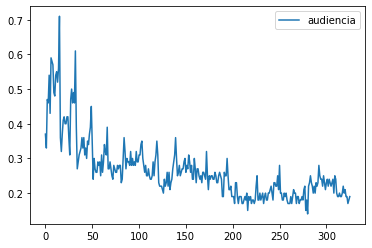

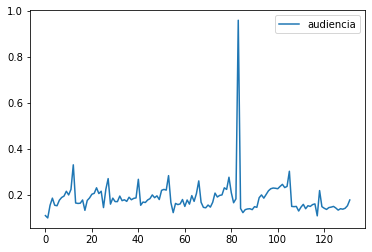

In [15]:
# Test de la función muestra_evolucion_audiencias
muestra_evolucion_audiencias(audiencias_gh, "Gran Hermano")

muestra_evolucion_audiencias(audiencias_masterchef, "Master Chef")

Para responder a la última pregunta implementaremos la función <code>muestra_medias_por_ediciones</code>. Esta función, que también toma como entrada una lista de tuplas (edición, _share_), se apoyará en la función <code>medias_por_ediciones</code> para calcular un diccionario con las medias de _share_ de cada edición. Los valores de este diccionario se mostrarán en un diagrama de barras en el que en el eje _X_ se representarán las ediciones, y la media de los _shares_ se corresponderá con la altura de las barras.

Las siguientes celdas contienen la implementación y el test, respectivamente, de esta función.

In [16]:
def muestra_medias_por_ediciones(audiencias):
    ''' Genera un diagrama de barras con la media de audiencia de cada edición
    
    ENTRADA: 
       @param audiencias: lista de audiencias
       @type audiencias: [(int, float)]
    SALIDA EN PANTALLA:
       - gráfica con las medias por cada edición

    Toma como entrada una lista de tuplas (edición, share) y muestra un diagrama
    de barras. Habrá una barra por cada edición presente en la lista de audiencias.
    Se mostrará la media de shares de cada edición.
    
    Estas son las instrucciones 'matplotlib' para trazar el diagrama de barras
    a partir de una lista de ediciones y otra lista (con el mismo orden) de
    medias de shares:
        plt.bar(ediciones, lista_medias)
        plt.xticks(ediciones, ediciones, fontsize=8)
        plt.show()
    '''
    
    # Calculamos las medias por cada edición
    dicc_medias = medias_por_ediciones(audiencias)
    # Calculamos la lista de ediciones
    ediciones = sorted(dicc_medias.keys())
    # Generamos una lista de medias con el mismo orden que las ediciones
    lista_medias = [dicc_medias[e] for e in ediciones]
    # Componemos y visualizamos la gráfica
    plt.title(f"Medias de shares por edición del programa {nombre_programa}")
    plt.xlabel("ediciones")
    plt.ylabel("medias")
    plt.bar(ediciones, lista_medias)
    plt.xticks(ediciones, ediciones, fontsize=8)
    plt.show()

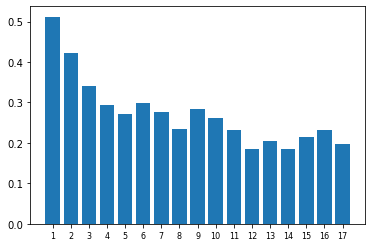

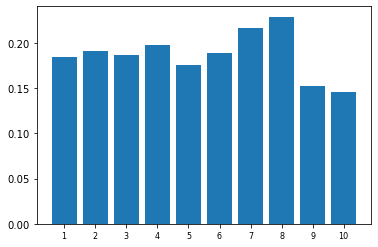

In [17]:
# Test de la función muestra_medias_por_ediciones
muestra_medias_por_ediciones(audiencias_gh)

muestra_medias_por_ediciones(audiencias_masterchef)

## 4. Un par de ejercicios

Cerramos este notebook con un par de ejercicios sin implementar. Se trata de dos funciones que calculan _informaciones derivadas_ a partir de los datos de entrada. Son dos funciones simples de pocas LDCs (Líneas De Código) cada una, con tratamientos muy comunes sobre secuencias de datos numéricos. Con una búsqueda simple en _stackoverflow_ se pueden encontrar fragmentos de código que, con pocos cambios, pueden ayudarnos a obtener la solución.

La primera de las funciones se llama <code>calcula_estadisticos</code>. Toma como entrada una lista de tuplas (edición, _share_) y calcula diversos estadísticos de la serie de _shares_ (media, mediana, máximo y mínimo). Para nuestros datos de entrada, por ejemplo, podríamos obtener una salida como esta:

<pre>
        Media:   0.265
        Mediana: 0.25
        Máximo:  0.71
        Mínimo:  0.14
</pre>

Las siguientes celdas contienen la cabecera y el test, respectivamente, de la función <code>calcula_estadisticos</code> y de la función de apoyo <code>mediana</code>:

In [45]:
def mediana(lista):
    ''' Calcula la mediana de una serie
    
    ENTRADA: 
       @param lista: serie de valores numéricos
       @type lista: [float]
    SALIDA:
       @return: mediana de los valores de entrada
       @rtype: float
    '''
    # Ordenamos la lista y calculamos su tamaño
   
    # La mediana se calcula de forma distinta si el número de elementos es par o impar
   
    return None

def calcula_estadisticos(audiencias):
    ''' Calcula la media, mediana, máximo y mínimo de una lista de audiencias
    
    ENTRADA: 
       @param audiencias: lista de audiencias
       @type audiencias: [(int, float)]
    SALIDA:
       @return: media, mediana, máximo y mínimo
       @rtype: (float, float, float, float)
    '''
    # Calculamos la lista de shares sobre la que se calcularán los indicadores
    
    return None

    # Una solución más compacta haciendo uso del módulo statistics de la librería estándar
    #return (statistics.mean(shares), statistics.median(shares), max(shares), min(shares))

In [46]:
# Test de la función calcula_estadisticos
media_gh, mediana_gh, maximo_gh, minimo_gh = calcula_estadisticos(audiencias_gh)
print("Estadísticos del programa Gran Hermano:")
print('Media: ', media_gh)
print('Mediana:', mediana_gh)
print('Máximo:', maximo_gh)
print('Mínimo:', minimo_gh)

# Test de la función calcula_estadisticos
media_mc, mediana_mc, maximo_mc, minimo_mc = calcula_estadisticos(audiencias_masterchef)
print("\nEstadísticos del programa MasterChef:")
print('Media: ', media_mc)
print('Mediana:', mediana_mc)
print('Máximo:', maximo_mc)
print('Mínimo:', minimo_mc)

Estadísticos del programa Gran Hermano:
Media:  0.26585889570552185
Mediana: 0.25
Máximo: 0.71
Mínimo: 0.14

Estadísticos del programa MasterChef:
Media:  0.18668181818181812
Mediana: 0.1765
Máximo: 0.96
Mínimo: 0.1


La segunda función se llama <code>lista_medias_shares</code>. Toma como entrada una lista de tuplas (edición, _share_) y produce como salida una lista de tuplas (_media-shares_, edición) ordenada de mayor a menor por la media de _shares_. Esta función hace uso de la función <code>medias_por_ediciones</code> para calcular la media de _share_ de cada edición. Para nuestros datos de entrada, por ejemplo, podríamos obtener una salida como esta:

<pre>
        1 ->  0.512
        2 ->  0.422
        3 ->  0.341
        6 ->  0.298
        4 ->  0.294
        9 ->  0.283
        7 ->  0.277
        5 ->  0.272
       10 ->  0.261
        8 ->  0.235
       11 ->  0.232
       16 ->  0.232
       15 ->  0.214
       13 ->  0.204
       17 ->  0.197
       14 ->  0.186
       12 ->  0.185
</pre>


Las siguientes celdas contienen la cabecera y el test, respectivamente, de la función <code>lista_medias_shares</code>:

In [ ]:
def lista_medias_shares(audiencias):
    ''' Calcula una lista ordenada de ediciones según su media de shares
    
    ENTRADA: 
       @param audiencias: lista de audiencias 
       @type audiencias: [(int, float)]
    SALIDA:
       @return: pares (medias de audiencia, edición) ordenados de mayor a menor media
       @rtype: [(float, int)]
    '''
    # Convertimos el diccionario en una lista de tuplas
    
    # Ordenamos la lista por el primer componente (audiencias) y de mayor a menor (reverse=True)
    return None

In [ ]:
# Test de la función lista_medias_shares
shares_eds = lista_medias_shares(audiencias_gh)
for s, e in shares_eds:
    print("{:3d} -> {:6.3f}".format(e, s))